In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 0.11781396562939804


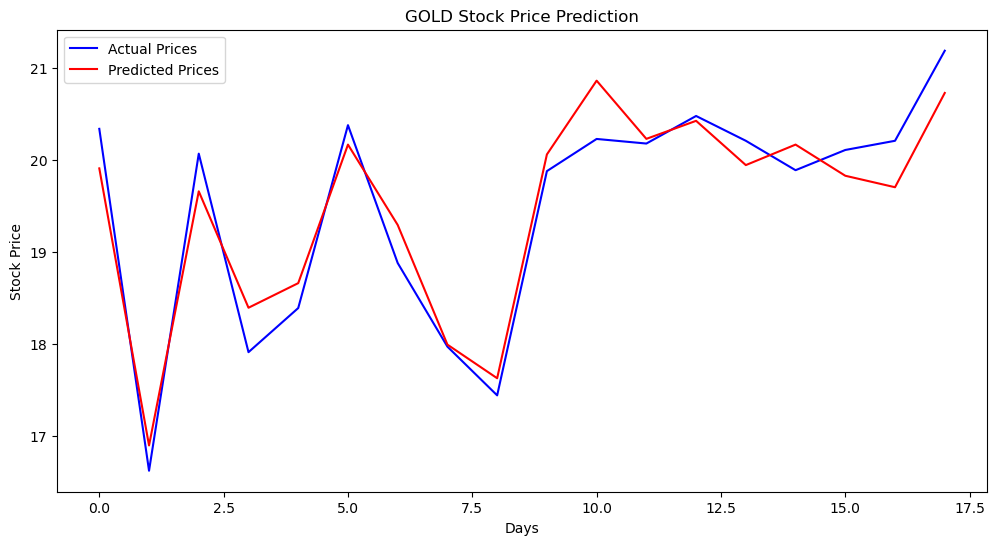

In [4]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetch historical stock price data (e.g., for Apple)
ticker = 'GOLD'
data = yf.download(ticker, start='2024-07-01', end='2024-11-1')

# Use 'Close' prices as the feature
X = data[['Close']].values
y = data['Close'].shift(-1).dropna().values  # Predict tomorrow's closing price

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) as a performance metric
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.legend()
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()


#In your specific case, where the MSE is approximately 0.0921, 
#it means that, on average, the squared difference between the predicted next
#day's closing prices and the actual next day's closing prices is approximately 0.0921. 
#Lower MSE values would indicate a more accurate predictive model, while higher MSE values 
#would suggest less accuracy.